In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
# 결측치 처리
print(train_df.info()) #Age
print(test_df.info()) # Age, Fare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [73]:
train_df.Age.fillna(train_df.Age.dropna().mean(), inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
test_df.Ticket.describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

In [75]:
test_df.Age.fillna(test_df.Age.dropna().median(), inplace=True)
test_df.Ticket.fillna(test_df['Ticket'].mode()[0], inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [76]:
train_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("Cabin",axis=1, inplace=True)
# train_df.loc[train_df.Cabin.isnull()==False]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [77]:
df = pd.DataFrame(train_df['Age'].groupby(by=pd.cut(train_df.Age,4)).count())
df.index.name = "AgeBand"
df.columns = ["Count"]
df

,Count
AgeBand,
"(0.34, 20.315]",179
"(20.315, 40.21]",562
"(40.21, 60.105]",128
"(60.105, 80.0]",22


<AxesSubplot:xlabel='Sex', ylabel='count'>

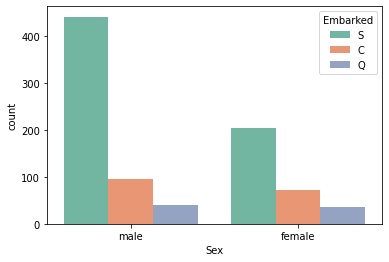

In [78]:
sns.countplot("Sex" ,hue = "Embarked", data=train_df, palette="Set2")

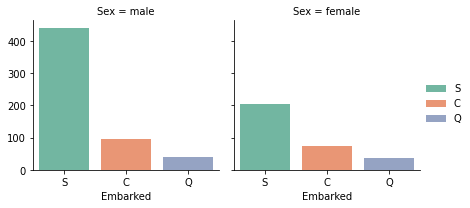

In [79]:
grid = sns.FacetGrid(col ="Sex",data=train_df)
grid.map(sns.countplot,"Embarked", hue="Embarked",palette="Set2",data=train_df,order=["S","C","Q"], hue_order=["S","C","Q"], dodge = False)
grid.add_legend()

In [80]:
train_df[["Pclass","Survived"]].groupby(by="Pclass").mean().sort_values(by="Survived", ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


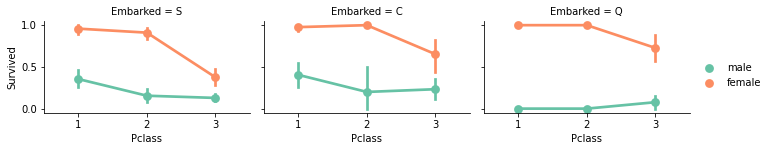

In [81]:
grid = sns.FacetGrid(col="Embarked", data=train_df, aspect=1.5, height=2.2)
grid.map(sns.pointplot, "Pclass", "Survived", hue="Sex", data=train_df, palette="Set2", order = None, hue_order = ["male","female"])
grid.add_legend()

In [82]:
combine = [train_df, test_df]
combine[0].Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [83]:
for dat in combine:
    dat["Title"] = dat.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
pd.crosstab(train_df["Title"], train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [84]:
for dat in combine:
    dat.Title = dat.Title.replace(["Capt","Col","Countess","Don","Dr","Jonkheer","Lady","Major","Mlle","Mme","Ms","Rev","Sir","Dona"], "Rare")
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [85]:
test_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [86]:
for dat in combine:
    dat['Title'] = dat.Title.map({'Mr':0,'Mrs':1,'Miss':2,'Master':3,'Rare':4})
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [87]:
test_df.Fare = test_df.Fare.fillna(test_df.Fare.dropna().mode()[0])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [88]:
for dat in combine:
    dat['Embarked']=dat['Embarked'].fillna(dat['Embarked'].dropna().mode()[0])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [89]:
test_df.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [90]:
for dat in combine:
    dat.drop(["Name","Ticket"], axis=1, inplace=True)
    dat['Sex']=dat.Sex.map({'male':0, 'female':1})
    dat['Embarked']=dat.Embarked.map({'S':0,'C':1,'Q':2})
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,1
2,3,1,3,1,26.0,0,0,7.9250,0,2
3,4,1,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0


In [91]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,2,0
1,893,3,1,47.0,1,0,7.0000,0,1
2,894,2,0,62.0,0,0,9.6875,2,0
3,895,3,0,27.0,0,0,8.6625,0,0
4,896,3,1,22.0,1,1,12.2875,0,1


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df.drop("Survived",axis=1), train_df["Survived"], test_size=0.3)
X_train.shape

(623, 9)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(),
                    LogisticRegression())
params = {'logisticregression__C':[1*10**i for i in range(-3, 3)]}
cv = GridSearchCV(pipe, param_grid=params, cv=3)
cv.fit(X_train, y_train)
cv.best_score_

0.8121980676328503

In [94]:
cv.score(X_test,y_test)

0.7873134328358209

In [95]:
from sklearn.svm import SVC
pipe = make_pipeline(StandardScaler(),
                    SVC())
params = {'svc__C':[1*10**i for i in range(-3,3)], 'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid']}
cv= GridSearchCV(pipe, param_grid=params, cv=3)
cv.fit(X_train, y_train)
cv.best_score_

0.8250418060200669

In [96]:
cv.score(X_test, y_test) # better!

0.8134328358208955

In [97]:
from sklearn.neighbors import KNeighborsClassifier
pipe = make_pipeline(StandardScaler(),
                    KNeighborsClassifier())
params = {'kneighborsclassifier__n_neighbors':[i for i in range(3,6)], 'kneighborsclassifier__weights':['uniform', 'distance']}
cv= GridSearchCV(pipe, param_grid=params, cv=3)
cv.fit(X_train, y_train)
cv.best_score_

0.80738263346959

In [98]:
from sklearn.ensemble import RandomForestClassifier
pipe = make_pipeline(StandardScaler(),
                    RandomForestClassifier())
params = {'randomforestclassifier__n_estimators':[10**i for i in range(1,3)], 'randomforestclassifier__criterion':["gini", "entropy"]}
cv= GridSearchCV(pipe, param_grid=params, cv=3)
cv.fit(X_train, y_train)
cv.best_score_

0.8122135513439862

In [99]:
cv.score(X_test, y_test) # best!

0.8283582089552238

In [100]:
sub = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': cv.predict(test_df)})
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [101]:
sub.to_csv("submission.csv", index=False)

In [60]:
import re
text = "우리집 집전화 번호는 00-111-2222이고, 나의 핸드폰 번호는 333-4444-5555이다."
phone_number_list=re.compile("\d{2,3}-\d{3,4}-\d{4}").finditer(text)
phone_number_list=[x.group() for x in phone_number_list]
phone_number_list

['00-111-2222', '333-4444-5555']

In [64]:
def Mobile(string):
    number = ''
    
    for i in range(len(string)):
        if string[i].isnumeric()==True:
            number+=string[i]
            
    if string[:2] == '01':
        if len(number) == 10 or len(number) == 11:
            pass
        else:
            return False
    
    else:
        return False
    
    return number

In [67]:
print(Mobile("010-1234-5555"))
print(Mobile("019-2930-1223"))
print(Mobile("1002331234"))

01012345555
01929301223
False


In [102]:
measure = pd.read_csv("Measurement_info.csv")
measure.head()

,Measurement date,Station code,Item code,Average value,Instrument status
0,2017-01-01 00:00,101,1,0.004,0
1,2017-01-01 00:00,101,3,0.059,0
2,2017-01-01 00:00,101,5,1.200,0
3,2017-01-01 00:00,101,6,0.002,0
4,2017-01-01 00:00,101,8,73.000,0


In [103]:
measure.isnull().count()

Measurement date     3885066
Station code         3885066
Item code            3885066
Average value        3885066
Instrument status    3885066
dtype: int64

In [104]:
pd.qcut(measure["Average value"],4).unique()

[(-1.001, 0.012], (0.012, 0.07], (0.07, 15.0], (15.0, 6256.0]]
Categories (4, interval[float64]): [(-1.001, 0.012] < (0.012, 0.07] < (0.07, 15.0] < (15.0, 6256.0]]

In [85]:
measure["so2"] = "bad"
measure.loc[(measure["Average value"] > 0.012) & (measure["Average value"] <= 0.07), "so2"] = "normal"
measure.loc[(measure["Average value"] > 0.07) & (measure["Average value"] <= 10.0), "so2"] = "good"
measure.loc[measure["Average value"] > 10, "so2"] = "great"
measure.head()

,Measurement date,Station code,Item code,Average value,Instrument status,so2,Weekday
0,2017-01-01 00:00,101,1,0.004,0,bad,Sun
1,2017-01-01 00:00,101,3,0.059,0,normal,Sun
2,2017-01-01 00:00,101,5,1.200,0,bad,Sun
3,2017-01-01 00:00,101,6,0.002,0,bad,Sun
4,2017-01-01 00:00,101,8,73.000,0,great,Sun


In [86]:
import datetime
measure["Weekday"] = measure["Measurement date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M").weekday())
measure["Weekday"].replace({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}, inplace=True)
measure.head()

,Measurement date,Station code,Item code,Average value,Instrument status,so2,Weekday
0,2017-01-01 00:00,101,1,0.004,0,bad,Sun
1,2017-01-01 00:00,101,3,0.059,0,normal,Sun
2,2017-01-01 00:00,101,5,1.200,0,bad,Sun
3,2017-01-01 00:00,101,6,0.002,0,bad,Sun
4,2017-01-01 00:00,101,8,73.000,0,great,Sun


In [90]:
result = pd.crosstab(measure["Weekday"], measure["so2"])
result

so2,bad,great,normal
Weekday,,,
Fri,261913,155562,138977
Mon,265913,155609,137876
Sat,257859,156399,135342
Sun,262462,156161,133977
Thu,262187,154718,137171
Tue,262821,160617,136662
Wed,257831,157255,137754


In [92]:
result = result.reindex(columns = ["bad","normal",'great'])
result = result.reindex(index = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
result

so2,bad,normal,great
Weekday,,,
Mon,265913,137876,155609
Tue,262821,136662,160617
Wed,257831,137754,157255
Thu,262187,137171,154718
Fri,261913,138977,155562
Sat,257859,135342,156399
Sun,262462,133977,156161


<AxesSubplot:xlabel='Weekday', ylabel='count'>

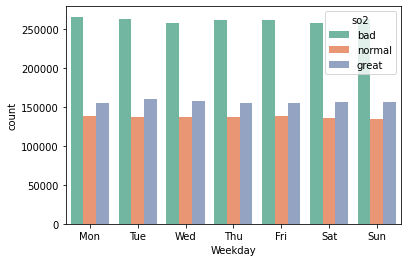

In [94]:
sns.countplot("Weekday",hue="so2",data=measure, palette="Set2", order=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], hue_order=["bad","normal","great"])

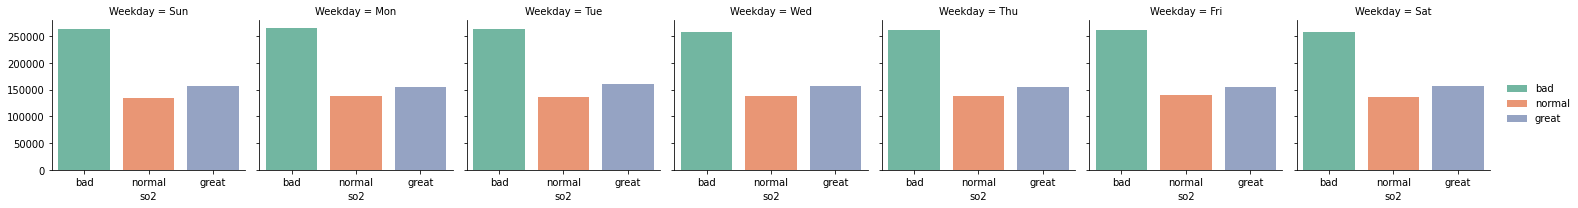

In [103]:
grid = sns.FacetGrid(col="Weekday",data=measure)
grid.map(sns.countplot,"so2",hue="so2",palette="Set2",order=["bad","normal","great"], hue_order=["bad","normal",'great'], dodge=False, data=measure)
grid.add_legend()

In [105]:
happy=pd.read_csv("2015.csv")
happy.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [106]:
table2 = happy[['Country','Happiness Score']]
happy.drop(['Happiness Score'], axis=1, inplace=True)

In [107]:
happy = pd.merge(happy, table2, on="Country")
happy.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


In [115]:
happy.drop(['Country', 'Happiness Rank','Standard Error','Dystopia Residual'], axis=1, inplace=True)
happy.columns = ["Region",'GDP','Family','LifeExp','Freedom','GovCorr','Generosity', 'Happiness']

In [116]:
happy.head()

,Region,GDP,Family,LifeExp,Freedom,GovCorr,Generosity,Happiness
0,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427


In [212]:
happy.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [220]:
happy2 = happy.copy()
happy2['Region'] = happy2['Region'].map({'Western Europe':0, 'North America':2, 'Australia and New Zealand':3,
       'Middle East and Northern Africa':4, 'Latin America and Caribbean':5,
       'Southeastern Asia':6, 'Central and Eastern Europe':7, 'Eastern Asia':8,
       'Sub-Saharan Africa':9, 'Southern Asia':10})
happy2.drop(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], axis=1, inplace=True)
happy2.head()

,Region,GDP,Family,LifeExp,Freedom,GovCorr,Generosity,Happiness
0,0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,0,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,0,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,0,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,2,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427


In [228]:
X_train, X_test, y_train, y_test = train_test_split(happy2.drop("Happiness", axis=1), happy2["Happiness"], test_size=0.3)
X_train.head()
pipe = make_pipeline(StandardScaler(),
                     LinearRegression())
pipe.fit(X_train, y_train)
print(pipe.score(X_train,y_train)) # same
print(mean_squared_error(y_test,pipe.predict(X_test))) # better
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

0.784605536639132
0.27933277002161555


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Happiness   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1213.
Date:                Sun, 30 May 2021   Prob (F-statistic):                    6.65e-96
Time:                        01:39:12   Log-Likelihood:                         -100.75
No. Observations:                 110   AIC:                                      215.5
Df Residuals:                     103   BIC:                                      234.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Region         0.0754      0.017      4.425      0.000       0.042       0.109
GDP            0.7796      0.319      2.442      0.016       0.146       1.413
Family         2.1110      0.301      7.015      0.000       1.514       2.708
LifeExp        1.7160      0.396      4.332      0.000       0.930       2.502
Freedom        1.4862      0.531      2.801      0.006       0.434       2.539
GovCorr        1.3343      0.594      2.246      0.027       0.156       2.513
Generosity     0.9734      0.503      1.934      0.056      -0.025       1.971
==============================================================================
Omnibus:                        4.316   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                3.684
Skew:                          -0.409   Prob(JB):                        0.159
Kurtosis:                       3.369   Cond. No.                         75.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [335]:
dummies = pd.get_dummies(happy["Region"], drop_first=True)
happy[list(dummies.columns)] = dummies
happy.head()

,Region,GDP,Family,LifeExp,Freedom,GovCorr,Generosity,Happiness,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587,0,0,0,0,0,0,0,0,0,1
1,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561,0,0,0,0,0,0,0,0,0,1
2,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527,0,0,0,0,0,0,0,0,0,1
3,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522,0,0,0,0,0,0,0,0,0,1
4,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427,0,0,0,0,0,1,0,0,0,0


In [336]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(happy.drop("Happiness", axis=1), happy["Happiness"], test_size=0.3)
X_train.head()

,Region,GDP,Family,LifeExp,Freedom,GovCorr,Generosity,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
85,Central and Eastern Europe,1.04345,0.88588,0.76890,0.35068,0.00649,0.13748,0,1,0,0,0,0,0,0,0,0
73,Southeastern Asia,0.82827,1.08708,0.63793,0.46611,0.00000,0.51535,0,0,0,0,0,0,1,0,0,0
56,Latin America and Caribbean,0.59325,1.14184,0.74314,0.55475,0.19317,0.27815,0,0,0,1,0,0,0,0,0,0
65,Western Europe,1.20806,1.07008,0.92356,0.49027,0.14280,0.26169,0,0,0,0,0,0,0,0,0,1
127,Sub-Saharan Africa,0.99355,1.10464,0.04776,0.49495,0.12474,0.10461,0,0,0,0,0,0,0,0,1,0


In [338]:
X_train.drop("Region", axis=1, inplace=True)
X_test.drop("Region", axis=1, inplace=True)
X_train.head()

,GDP,Family,LifeExp,Freedom,GovCorr,Generosity,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
85,1.04345,0.88588,0.76890,0.35068,0.00649,0.13748,0,1,0,0,0,0,0,0,0,0
73,0.82827,1.08708,0.63793,0.46611,0.00000,0.51535,0,0,0,0,0,0,1,0,0,0
56,0.59325,1.14184,0.74314,0.55475,0.19317,0.27815,0,0,0,1,0,0,0,0,0,0
65,1.20806,1.07008,0.92356,0.49027,0.14280,0.26169,0,0,0,0,0,0,0,0,0,1
127,0.99355,1.10464,0.04776,0.49495,0.12474,0.10461,0,0,0,0,0,0,0,0,1,0


In [339]:
X_test.head()

,GDP,Family,LifeExp,Freedom,GovCorr,Generosity,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
16,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,0,0,0,0,0,0,0,0,0,1
38,1.55422,1.16594,0.72492,0.55499,0.25609,0.16228,0,0,0,0,1,0,0,0,0,0
7,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,0,0,0,0,0,0,0,0,0,1
139,0.23906,0.79273,0.36315,0.22917,0.19900,0.17441,0,0,0,0,0,0,0,0,1,0
30,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,0,1,0,0,0,0,0,0,0,0


In [340]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     26.01
Date:                Sun, 30 May 2021   Prob (F-statistic):           5.76e-27
Time:                        08:07:52   Log-Likelihood:                -71.729
No. Observations:                 110   AIC:                             175.5
Df Residuals:                      94   BIC:                             218.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
GDP                                 0.8559      0.263      3.254      0.002       0.334       1.378
Family                              0.9890      0.260      3.809      0.000       0.473       1.505
LifeExp                             0.4683      0.489      0.957      0.341      -0.503       1.440
Freedom                             0.3731      0.466      0.801      0.425      -0.551       1.298
GovCorr                             1.8578      0.547      3.397      0.001       0.772       2.944
Generosity                          0.7866      0.539      1.461      0.147      -0.283       1.856
Australia and New Zealand           3.1198      0.610      5.113      0.000       1.908       4.331
Central and Eastern Europe          2.6946      0.389      6.919      0.000       1.921       3.468
Eastern Asia                        2.5481      0.490      5.203      0.000       1.576       3.521
Latin America and Caribbean         3.4171      0.423      8.086      0.000       2.578       4.256
Middle East and Northern Africa     2.7910      0.388      7.187      0.000       2.020       3.562
North America                       3.4740      0.692      5.020      0.000       2.100       4.848
Southeastern Asia                   2.6320      0.442      5.957      0.000       1.755       3.509
Southern Asia                       2.5665      0.367      6.988      0.000       1.837       3.296
Sub-Saharan Africa                  2.4811      0.252      9.857      0.000       1.981       2.981
Western Europe                      2.9432      0.487      6.045      0.000       1.977       3.910
==============================================================================
Omnibus:                        0.903   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.637   Jarque-Bera (JB):                0.962
Skew:                           0.208   Prob(JB):                        0.618
Kurtosis:                       2.806   Cond. No.                         45.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [342]:
X_train_drop = X_train.drop(["LifeExp","Freedom"], axis=1)
lm = sm.OLS(y_train, X_train_drop).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     30.02
Date:                Sun, 30 May 2021   Prob (F-statistic):           4.04e-28
Time:                        08:08:56   Log-Likelihood:                -72.639
No. Observations:                 110   AIC:                             173.3
Df Residuals:                      96   BIC:                             211.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
GDP                                 0.9494      0.238      3.993      0.000       0.477       1.421
Family                              0.9938      0.255      3.890      0.000       0.487       1.501
GovCorr                             2.0730      0.494      4.195      0.000       1.092       3.054
Generosity                          0.9791      0.513      1.909      0.059      -0.039       1.997
Australia and New Zealand           3.4922      0.524      6.668      0.000       2.453       4.532
Central and Eastern Europe          3.0171      0.277     10.901      0.000       2.468       3.566
Eastern Asia                        2.9347      0.369      7.958      0.000       2.203       3.667
Latin America and Caribbean         3.7875      0.298     12.708      0.000       3.196       4.379
Middle East and Northern Africa     3.0749      0.305     10.070      0.000       2.469       3.681
North America                       3.8337      0.626      6.129      0.000       2.592       5.075
Southeastern Asia                   2.9884      0.336      8.896      0.000       2.322       3.655
Southern Asia                       2.8144      0.303      9.278      0.000       2.212       3.416
Sub-Saharan Africa                  2.6378      0.217     12.157      0.000       2.207       3.069
Western Europe                      3.3376      0.358      9.313      0.000       2.626       4.049
==============================================================================
Omnibus:                        1.356   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.436
Skew:                           0.237   Prob(JB):                        0.488
Kurtosis:                       2.702   Cond. No.                         29.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [345]:
X_test_drop = X_test.drop(["LifeExp","Freedom"], axis=1)
y_pred = lm.predict(X_test_drop)

In [349]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

pipe = make_pipeline(StandardScaler(),
                     LinearRegression())
pipe.fit(X_train, y_train)
print(pipe.score(X_train,y_train)) # same
print(mean_squared_error(y_test,pipe.predict(X_test))) # better
print(pipe.score(X_test, y_test))

pipe.fit(X_train_drop, y_train)
print(mean_squared_error(pipe.predict(X_test_drop),y_test))
print(pipe.score(X_test_drop, y_test))

0.8058346304518887
0.3591916735177554
0.7937472876362047
0.3859354958710697
0.778390623476021


In [205]:
from sklearn.svm import SVR
pipe = make_pipeline(StandardScaler(),
                     SVR())
params = {"svr__C":[1*10**(i) for i in range(0,3)], "svr__kernel":['linear', 'poly', 'rbf', 'sigmoid']}
cv = GridSearchCV(pipe, param_grid=params, cv=3)
fit = cv.fit(X_train, y_train)

In [206]:
fit.best_score_

0.785264790729141

In [207]:
fit.score(X_test,y_test)

0.6831045132846082

In [208]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, fit.predict(X_test))

0.3633269868834324

In [196]:
from sklearn.svm import SVR
pipe = make_pipeline(StandardScaler(),
                     SVR())
params = {"svr__C":[1*10**(i) for i in range(0,3)], "svr__kernel":['linear', 'poly', 'rbf', 'sigmoid']}
cv = GridSearchCV(pipe, param_grid=params, cv=3)
fit = cv.fit(X_train_drop, y_train)
print(fit.best_score_)
print(fit.score(X_test_drop,y_test))

0.7902732184382623
0.6773159359681702


In [204]:
mean_squared_error(y_test, fit.predict(X_test_drop))

0.3699637060633811

In [ ]:
#이미지 데이터 전처리
X_train.reshape(-1,32*32*3) # 3차원 -> 1치원
X_train.reshape(-1,32*32*3)/255 # 정규화